<a href="https://colab.research.google.com/github/jp-data/template_portfolio/blob/master/Feminicidios_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**As taxas de feminicidio no Brasil estão entre as 10 maiores do mundo. Há 
anos, as autoridades brasileiras vem implementando diversas leis, politicas e programas na área de assistência social 
para diminuir esses números. Inclusive fora decretado, junto com a Lei Maria da Penha, a obrigatoriedade das autoridades em dispor para a sociedade dados abertos a respeito dos casos de homicídio de mulheres no Brasil. Orgãos como o Ministério da Justiça, o Ministério da Saúde, dentre outros, publicam periodicamente estes dados, muitas vezes discriminados por raça, idade, estado civil e outras caracteristicas das vítimas.**

**A possibilidade do presente estudo é possível justamente a isso. Através do Sistema de Informação sobre Mortalidade, pertencente ao Ministério da Saúde, orgão que dispõe anualmente dados sobre homicidios de mulheres por agressão através do site do DATASUS, o projeto tem o objetivo de explorar alguns desses dados em nosso país ao longo de uma série de dez anos, que vai de 2008 a 2018. Os dados gerados, - não é novidade - colaboram com os tomadores de decisões a medida que identifica traços sociais desse tipo de crime.**



A primeira etapa é importar as principais bibliotecas para o tratamento desses dados.

In [1]:
#geração de gráficos na interface do G.colab
%matplotlib inline 
#bibliotecas principais
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Leitura dos arquivos (disponíveis nos uploads da própria interface do G.Coolab), definido como versão latino americana e atribuido como separador ';'
dados_brasil = pd.read_csv('/content/fem_tx_nacional.csv',encoding='latin-1',sep=';')
dados_ufs=pd.read_csv('/content/fem_txlocal.csv',encoding='latin-1',sep=';')
dados_brasil.head()

,ano,mortes,população
0,2008,4023,96.715.476
1,2009,4260,97.767.914
2,2010,4465,98.791.094
3,2011,4512,99.786.721
4,2012,4719,100.755.204


**O DataSet traz os dados referentes aos homicídios de mulheres ocorridos no Brasil ano a ano, no período que vai de 2008 a 2018.**

**-Na primeira coluna encontramos os anos dos registros.**

**-Na segunda coluna o numero de homícidios por agressão e na terceira coluna a estimativa da população feminina em nosso território.**

**-Usaremos essa coluna para criarmos uma taxa de feminicídio, uma vez que não dispomos de tal dado.**

In [3]:
#conhecendo o formato dos dados de cada variável
dados_brasil.dtypes

ano           int64
mortes        int64
população    object
dtype: object

**-Observamos que a coluna que traz a estimativa populacional feminina fora tratada como dados de strings.**

**-Vamos então transformar esses dados em uma série de numeros inteiros, de forma a viabilizar a construção das taxas de feminicídio.**

In [4]:
#acessando a coluna tratada como strings, substituindo os pontos entre os números para que depois seja possível tranformar seus formatos. 
dados_brasil.população=dados_brasil.população.str.replace('.','').astype(int)

#criando uma lista que resulta da razão entre os homicidios de mulheres e a estimativa da população feminina (ambas variáveis acessadas por dot notation no Dataset),
# multiplicada por 100000, o que nos fornece a taxa de homicidios de mulheres a cada 100 mil mulheres no território.
lista=(dados_brasil.mortes/dados_brasil.população)*100000

#arredondando os valores para uma casa decimal com a função round e logo então adicionando essa lista ao Dataset
lista=round(lista,1)
dados_brasil['tx_nacional_homicidios']=pd.Series(lista)

#visualizando o DataSet com a nova variável
dados_brasil.head()

,ano,mortes,população,tx_nacional_homicidios
0,2008,4023,96715476,4.2
1,2009,4260,97767914,4.4
2,2010,4465,98791094,4.5
3,2011,4512,99786721,4.5
4,2012,4719,100755204,4.7


In [5]:
#verificando novamente o formato dos dados
dados_brasil.dtypes

ano                         int64
mortes                      int64
população                   int64
tx_nacional_homicidios    float64
dtype: object

**- Pelo código abaixo, podemos observar que a taxa de feminicidio no Brasil, segundo estes dados do DATASUS, se situou em uma média de 4.5 mortes de mulheres a cada 100mil mulheres nesses ultimos dez anos.**

**- O menor valor da série foi de 4.2 mortes a cada 100 mil mulheres; o maior valor fora de 4.7 homicidios violentos a cada 100 mil mulheres.**

In [6]:
#verificando a média e os valores máximo e mínimo das taxas de homicidios criadas. 
dados_brasil.tx_nacional_homicidios.agg(['min','max','mean'])

min     4.200000
max     4.700000
mean    4.509091
Name: tx_nacional_homicidios, dtype: float64

#**Observando dados brutos.**

**O código abaixo mostra que o DataFrame possui 11 observações.**

**Então vamos acessar as mortes ocorridas no indice 0, que corresponde a primeira observação, no ano de 2008, bem como acessar as mortes registradas no indice 10, correspondente a ultima observação, no ano de 2018, para dessa forma verificar a variação desses dados.**

In [7]:
#visualizando o número de observações do DATASET.
print('O DataSet possui',(len(dados_brasil)),'observações.')
#Acessando as mortes ocorridas no primeiro e no último ano da série analisada.
print('Homicidios violentos de mulheres ocorridos em 2008:', (dados_brasil.mortes.loc[0]))
print('Homicidios violentos de mulheres ocorridos em 2018:', (dados_brasil.mortes.loc[10]))

O DataSet possui 11 observações.
Homicidios violentos de mulheres ocorridos em 2008: 4023
Homicidios violentos de mulheres ocorridos em 2018: 4512


#**Observando a trajetória desses dados graficamente.**

**Abaixo um código para visualizar a tendência de elevação da taxa de homicídios de mulheres por agressão ao longo dos últimos anos.**

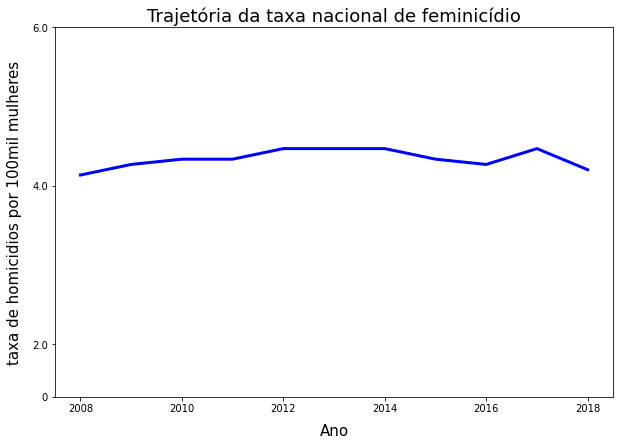

In [17]:
#Definindo os eixos X e Y do gráfico por Dot Notation.
x=dados_brasil.ano
y=dados_brasil.tx_nacional_homicidios

#plotando o gráfico definindo o marcador, sua cor e tamanho.
figura= plt.figure(figsize=(10,6.8))
figura= plt.plot(x,y,c='blue',ls='-',lw=3)

#criando variáveis de escala para os eixos X e Y.
eixoY=[0,2.0,4.0,6.0]
eixoX=[2008,2010,2012,2014,2016,2018]

#definindo a escala visual dos eixos
plt.yticks([0,1,4,7],eixoY)
plt.xticks([2008,2010,2012,2014,2016,2018],eixoX)

#incluindo as legendas dos eixos
plt.xlabel('Ano',color='black',fontsize=15, labelpad= 10)
plt.ylabel('taxa de homicidios por 100mil mulheres',color='black',fontsize=15, labelpad= 10)
plt.title('Trajetória da taxa nacional de feminicídio',fontsize=18)
plt.show()

**Podemos claramente observar essa elevação no inicio da série, que vai de 2008 a 2014; logo após, até o ano de 2016, houve uma leve tendência de queda. Os casos aumentam em 2017 e atinge o maior número da série - 4.7 mortes a cada 100 mil mulheres -  e diminuem novamente em 2018.**

#**Observando as taxas regionais de feminicídio.**

---



In [19]:
dados_ufs.head(20)

,ufs,ano,mortes,população
0,Rondonia,2008,39,788669
1,Rondonia,2009,52,800782
2,Rondonia,2010,37,812517
3,Rondonia,2011,48,823916
4,Rondonia,2012,50,835006
5,Rondonia,2013,49,845792
6,Rondonia,2014,56,856278
7,Rondonia,2015,63,866454
8,Rondonia,2016,53,876337
9,Rondonia,2017,62,885954


**-Este DataSet traz o número anual de homicídios de mulheres por motivos de agressão e as estimativas populacionais femininas, ambos dados separados por ano e estados brasileiros.** 

**-Vamos criar a taxa de homicidios de mulheres a cada 100 mil mulheres para cada estado, em cada ano, de forma a visualizarmos graficamente o comportamento dessas taxas ao longo da série**

In [20]:
#conhecendo o formato de cada variável
dados_ufs.dtypes

ufs          object
ano           int64
mortes        int64
população     int64
dtype: object

In [21]:
#criando uma coluna no DataSet que irá conter as taxas de homicidios de mulheres por agressão a cada 100 mil mulheres:
#acessaremos os dados por Dot Notation e faremos a razão entre as mortes e a população feminina estimada e então multiplicaremos por 100mil.
#Com a função round arrendodaremos os resultados com somente uma casa decimal.
dados_ufs['tx_regional_homicidios']=round((dados_ufs.mortes/dados_ufs.população)*100000,1)

#visualizando o novo DataSet
dados_ufs.head(25)

,ufs,ano,mortes,população,tx_regional_homicidios
0,Rondonia,2008,39,788669,4.9
1,Rondonia,2009,52,800782,6.5
2,Rondonia,2010,37,812517,4.6
3,Rondonia,2011,48,823916,5.8
4,Rondonia,2012,50,835006,6.0
5,Rondonia,2013,49,845792,5.8
6,Rondonia,2014,56,856278,6.5
7,Rondonia,2015,63,866454,7.3
8,Rondonia,2016,53,876337,6.0
9,Rondonia,2017,62,885954,7.0


-**Nota: como o Dataset traz os dados para cada estado brasileiro ao longo dos anos, estados com nomes compostos foram registrados com espaço entre seus nomes, o que pode atrapalhar as iterações que faremos no DataSet.**

-**Logo, vamos substituir as strings que contêm espaços por strings separadas por '_' ; por exemplo, a uf 'Distrito Federal' passará a ser identificada como 'Distrito_Federal'.**



In [22]:
#dados com nomes compostos podem atrapalhar as iterações uma vez que seus nomes são separados por espaço.
dados_ufs.tail()

,ufs,ano,mortes,população,tx_regional_homicidios
292,Distrito Federal,2014,76,1498920,5.1
293,Distrito Federal,2015,70,1533244,4.6
294,Distrito Federal,2016,69,1567545,4.4
295,Distrito Federal,2017,47,1601779,2.9
296,Distrito Federal,2018,55,1635788,3.4


In [23]:
#com Dot Notation e a função replace, acessamos todas as ufs com nomes compostos na coluna 'ufs' e substituimos os espaços por '_'
dados_ufs.ufs=dados_ufs.ufs.str.replace(' ','_')
dados_ufs.tail()

,ufs,ano,mortes,população,tx_regional_homicidios
292,Distrito_Federal,2014,76,1498920,5.1
293,Distrito_Federal,2015,70,1533244,4.6
294,Distrito_Federal,2016,69,1567545,4.4
295,Distrito_Federal,2017,47,1601779,2.9
296,Distrito_Federal,2018,55,1635788,3.4


**Vamos então observar os dados dessas ufs. Intuitivamente, sabemos que ao longo da série alguns estados apresentam quedas da taxa de feminicidio, enquanto outros apresentam aumentos significativos. Através de gráficos, vamos então  visualizar  o comportamento dessas variáveis ao longo desses 10 anos.** 

**Para melhor visualização desses gráficos, vamos separar os dados por região e observar as tendências.**

**Agrupando dados por região**

**- Lançando mão do conceito de tabela verdade, agruparemos em uma variável os dados das uf's pertencentes cada uma a sua respectiva região.**

**- Por exemplo: para a região norte, criarei uma variável que conterá todos os dados de cada estado da região norte, e assim sucessivamente.**

In [24]:
#'tx_norte' ira agregar os dados das unidades federativas da região Norte.
tx_norte=dados_ufs[(dados_ufs.ufs=='Rondonia')|(dados_ufs.ufs=='Acre')|(dados_ufs.ufs=='Roraima')|
                   (dados_ufs.ufs=='Tocantins')|
                   (dados_ufs.ufs=='Amazonas')|(dados_ufs.ufs=='Para')|(dados_ufs.ufs=='Amapa')]

#'tx_nordeste' ira agregar os dados das unidades federativas da região Nordeste
tx_nordeste=dados_ufs[(dados_ufs.ufs=='Bahia')|(dados_ufs.ufs=='Ceara')|(dados_ufs.ufs=='Sergipe')|
                      (dados_ufs.ufs=='Alagoas')|(dados_ufs.ufs=='Paraiba')|(dados_ufs.ufs=='Pernambuco')|
                      (dados_ufs.ufs=='Piaui')|(dados_ufs.ufs=='Rio_Grande_do_Norte')|(dados_ufs.ufs=='Maranhão')]

#'tx_sudeste' ira agregar os dados das unidades federativas da região Sudeste.
tx_sudeste=dados_ufs[(dados_ufs.ufs=='Minas_Gerais')|(dados_ufs.ufs=='São_Paulo')|
                     (dados_ufs.ufs=='Rio_de_Janeiro')|(dados_ufs.ufs=='Espirito_Santo')]

#'tx_sul' irá agregar os dados das unidades federativas da região sul.
tx_sul=dados_ufs[(dados_ufs.ufs=='Rio_Grande_do_Sul')|(dados_ufs.ufs=='Parana')|(dados_ufs.ufs=='Santa_Catarina')]

#'tx_centro_oeste' irá agregar os dados das unidades federativas da regiaão Centro Oeste.
tx_centro_oeste=dados_ufs[(dados_ufs.ufs=='Mato_Grosso')|(dados_ufs.ufs=='Mato_Grosso_do_Sul')|
                          (dados_ufs.ufs=='Goias')|(dados_ufs.ufs=='Distrito_Federal')]

#**-Visualização gráfica.**

**- Inicialmente, para atribuir a cada variável y os valores das taxas de feminicídio e desse modo iniciar a plotagem dos gráficos, optei pelo método LOC (location). Logo, fora necessário usar como indexadores do DATASET os próprios nomes das unidades federativas de cada região, tal qual visto no codigo abaixo.**

In [25]:
#alterando os indexadores de cada variável criada no código anterior; os indexadores serão os próprios nomes das unidades federativas
tx_norte=tx_norte.set_index(['ufs'])
tx_nordeste=tx_nordeste.set_index(['ufs'])
tx_sudeste=tx_sudeste.set_index(['ufs'])
tx_sul=tx_sul.set_index(['ufs'])
tx_centro_oeste=tx_centro_oeste.set_index(['ufs'])

#visualizando um DataSet qualquer de forma a observar o novo indexador.
tx_nordeste.head(20)

,ano,mortes,população,tx_regional_homicidios
ufs,,,,
Alagoas,2008,83,1618624,5.1
Alagoas,2009,109,1634511,6.7
Alagoas,2010,134,1649639,8.1
Alagoas,2011,138,1664044,8.3
Alagoas,2012,133,1677754,7.9
Alagoas,2013,142,1690793,8.4
Alagoas,2014,127,1703206,7.5
Alagoas,2015,95,1715038,5.5
Alagoas,2016,100,1726284,5.8


#**Plotando os gráficos.**

**-Os código abaixos irão plotar os gráficos de cada região e vão seguir esta ordem:**

**-Se iniciam pela determinação do eixo x: os anos de observação deste trabalho.** 

**-Em seguida, através do metodo LOC - como visto anteriormente, são atribuidas as variaveis dependentes y's as taxas de feminicidio de cada estado, o que somará n diferentes tipos de valores para o eixo Y, sendo n igual ao número de estados da região.**

**-O próximo passo foi escolher as medidas de cada gráfico e o espaçamento entre cada um deles.**

**-O passo final foi a codificação dos n gráficos de cada estado de cada região e que se referem ao comportamento das taxas de feminicidio de cada um deles ao longo da série.**

**Região Norte: Na subplotagem, optei por dividir o espaço para a geração dos gráficos em 9 quadrantes distribuidos em 3 linhas e 3 colunas.** 

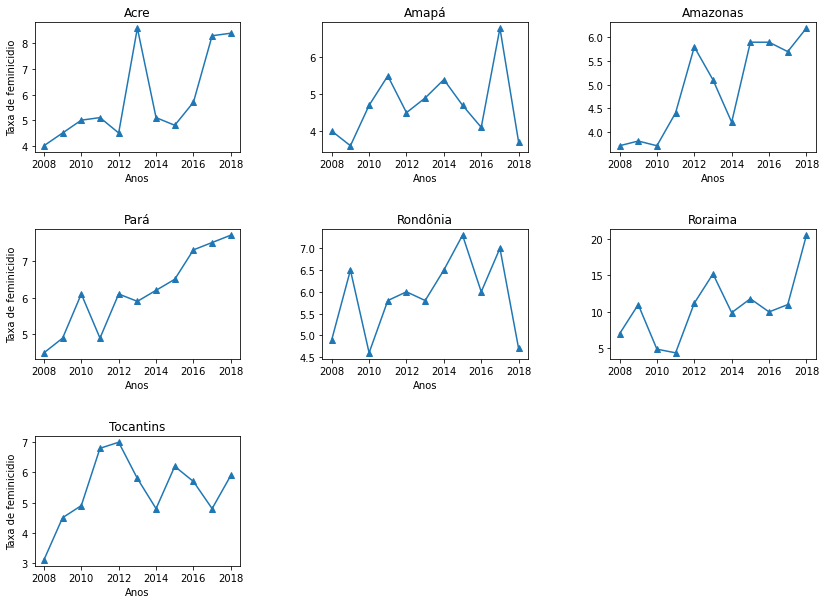

In [26]:
#eixo x: os anos da série dos dados
x=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

#eixo Y: sete valores para o eixo, que correspondem aos sete estados da região norte.
y1=tx_norte.loc['Acre','tx_regional_homicidios']
y2=tx_norte.loc['Amapa','tx_regional_homicidios']
y3=tx_norte.loc['Amazonas','tx_regional_homicidios']
y4=tx_norte.loc['Para','tx_regional_homicidios']
y5=tx_norte.loc['Rondonia','tx_regional_homicidios']
y6=tx_norte.loc['Roraima','tx_regional_homicidios']
y7=tx_norte.loc['Tocantins','tx_regional_homicidios']

##definindo a largura e altura de cada gráfico, bem como o espaçamento lateral e horizontal entre cada um deles. 
figura=plt.figure(figsize=(14,10))
figura.subplots_adjust(hspace = 0.6,wspace = 0.4)


#plotagem de cada um dos sete gráficos
figura.add_subplot(3,3,1)
plt.plot(x,y1,marker='^')
plt.title('Acre')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,2)
plt.plot(x,y2,marker='^')
plt.title('Amapá')
plt.xlabel('Anos')

figura.add_subplot(3,3,3)
plt.plot(x,y3,marker='^')
plt.title('Amazonas')
plt.xlabel('Anos')

figura.add_subplot(3,3,4)
plt.plot(x,y4,marker='^')
plt.title('Pará')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,5)
plt.plot(x,y5,marker='^')
plt.title('Rondônia')
plt.xlabel('Anos')

figura.add_subplot(3,3,6)
plt.plot(x,y6,marker='^')
plt.title('Roraima')

figura.add_subplot(3,3,7)
plt.plot(x,y7,marker='^')
plt.title('Tocantins')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

plt.show()


**-Observando os gráficos, vemos que em em cinco estados da região norte houve aumento da taxa de feminicídio no periodo entre 2008 e 2018.**

**-O destaque vai para o estado de Roraima, onde se observa uma variação brusca entre 2008 e 2018; a taxa passa de aproximadamente 7.0 mortes para cada 100 mil mulheres em 2008 para aproximadamente 20.0 mulheres assassinadas a cada 100 mil no ano de 2018.**

**-Em seguida temos os estados de Pará e Acre com as maiores variações positivas e com as maiores taxas em 2018. Em 2008 o estado do Pará apresentou uma taxa de aproximadamente 4.0 homicídios de mulheres a cada 100 mil, mas no ano de 2018 essa taxa duplica e alcança aproximadamente 8.0 dessas mortes a cada 100 mil mulheres, sendo que a partir do ano de 2013 é expressivamente observável essa tendência de aumento da taxa no estado. Uma variação decenal semelhante ocorreu no estado Acre: a taxa em 2018 de aproximadamente 8.5 mortes a cada 100 mil mulheres alcança o dobro da observada em 2008 – 4.0 mortes a cada 100 mil mulheres, com uma tendência de elevação observável a partir do ano de 2015, logo após uma tendência de queda anteriormente observada.**

**-Os estados do Amazonas e Tocantins também apresentaram elevação das taxas ao longo da série. Em amazonas a variação é mais expressiva: a taxa duplica, indo de aproximadamente 3.5 mortes de mulheres a cada 100mil em 2008 para aproximadamente 6.5 mortes a cada 100 mil mulheres em 2018, alcançando o maior registro dessas mortes. Em Tocantins, a mesma taxa alcança um pouco menos de 6.0 mortes a cada 100mil mulheres em 2018, ante aproximadamente 3.0 das mesmas mortes em 2008, porém o maior valor observado no estado é no ano de 2012, no qual a taxa se situou em aproximadamente 7.0 homicidios violentos de mulheres a cada 100 mil mulheres.**

**-Em Rondônia e no Amapá as taxas em 2018 apresentaram um valor menor que o observado em 2008. No estado de Amapá, após uma tendência de elevação da taxa nos primeiros anos da série, com o maior valor observado no ano de 2017 de aproximadamente 7.0 homicídios violentos de mulheres a cada 100 mil mulheres, a taxa se situou em 3.5 homicídios violentos de mulheres a cada 100 mil mulheres em 2018, ante uma taxa de 4.0 para cem mil mulheres em 2008. Em Rondônia a diminuição é mais branda; apesar de coexistir ao longo da série tendências de elevação, a taxa em 2018 alcança um valor menor que o observado em 2008. De aproximadamente 4.8 mortes para aproximadamente 4.5 mortes a cada 100 mil mulheres; o maior valor registrado ocorreu no ano de 2015, ano no qual a taxa se situou em aproximadamente 7.5 mortes violentas a cada 100 mil mulheres.**

**Região Nordeste.**

**Novamente optei por dividir o espaço para a geração dos graficos em 9 quadrantes distribuidos em 3 linhas e 3 colunas.**

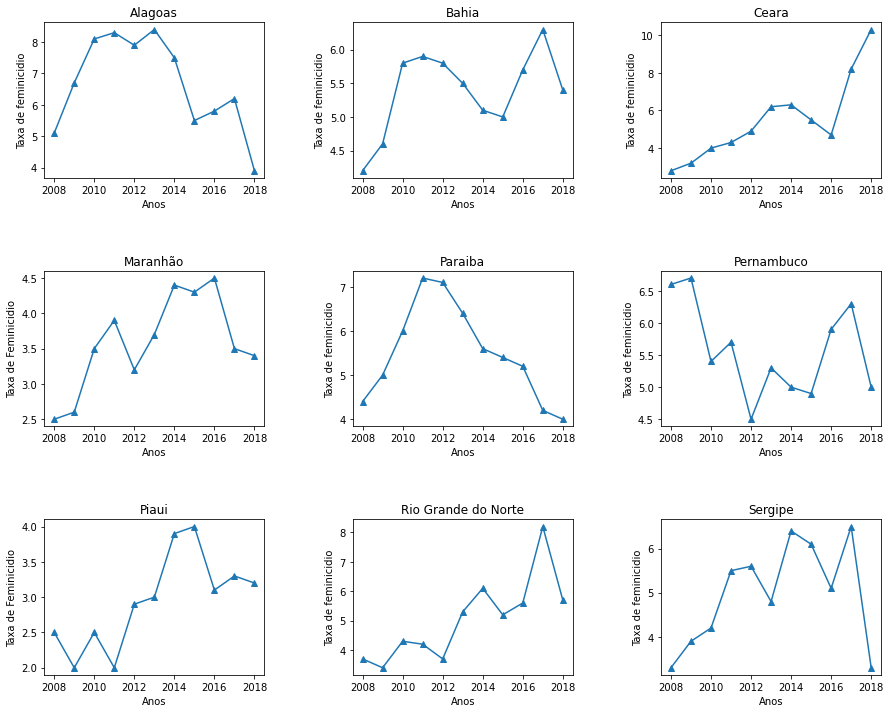

In [29]:
#obs: o eixo X ja fora definido no código anterior

#eixo Y: nove valores para o eixo que correspondem aos nove estados da região nordeste.
y1=tx_nordeste.loc['Alagoas','tx_regional_homicidios']
y2=tx_nordeste.loc['Bahia','tx_regional_homicidios']
y3=tx_nordeste.loc['Ceara','tx_regional_homicidios']
y4=tx_nordeste.loc['Maranhão','tx_regional_homicidios']
y5=tx_nordeste.loc['Paraiba','tx_regional_homicidios']
y6=tx_nordeste.loc['Pernambuco','tx_regional_homicidios']
y7=tx_nordeste.loc['Piaui','tx_regional_homicidios']
y8=tx_nordeste.loc['Rio_Grande_do_Norte','tx_regional_homicidios']
y9=tx_nordeste.loc['Sergipe','tx_regional_homicidios']


#definindo a largura e altura de cada gráfico, bem como o espaçamento lateral e horizontal entre cada um deles. 
figura=plt.figure(figsize=(15,12))
figura.subplots_adjust(hspace = 0.6,wspace = 0.4)

#subplotagem de cada um dos nove gráficos
figura.add_subplot(3,3,1)
plt.plot(x,y1,marker='^')
plt.title('Alagoas')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,2)
plt.plot(x,y2,marker='^')
plt.title('Bahia')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,3)
plt.plot(x,y3,marker='^')
plt.title('Ceara')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,4)
plt.plot(x,y4,marker='^')
plt.title('Maranhão')
plt.xlabel('Anos')
plt.ylabel('Taxa de Feminicidio')

figura.add_subplot(3,3,5)
plt.plot(x,y5,marker='^')
plt.title('Paraiba')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,6)
plt.plot(x,y6,marker='^')
plt.title('Pernambuco')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,7)
plt.plot(x,y7,marker='^')
plt.title('Piaui')
plt.xlabel('Anos')
plt.ylabel('Taxa de Feminicidio')

figura.add_subplot(3,3,8)
plt.plot(x,y8,marker='^')
plt.title('Rio Grande do Norte')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(3,3,9)
plt.plot(x,y9,marker='^')
plt.title('Sergipe')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

plt.show()

**No nordeste brasileiro os estados de Alagoas, Paraíba, Pernambuco e Sergipe apresentaram em 2018 uma taxa menor que a observada em 2008, enquanto que nos estados da Bahia, Ceara, Maranhão, Rio Grande do Norte e Piauí ocorreu o inverso.** 

**O estado do Ceará registrou a maior taxa de homicídios de mulheres a cada 100 mil mulheres bem como a maior variação decenal da mesma. Em 2008 fora registrada uma taxa de aproximadamente 3.0 homicídios violentos de mulheres a cada 100 mil mulheres, e no ano de 2018 essa taxa subiu para aproximadamente 10 mortes a cada 100 mil mulheres. A tendência de elevação é constante até o ano de 2014, a partir de então é registrado pelos dois anos seguintes duas leves quedas anuais e novamente uma elevação constante até o ano de 2018.**

**Na Bahia a taxa vai de aproximadamente 4.0 homicídios de mulheres a cada 100 mil mulheres em 2008 para um registro de aproximadamente 5.3 dos mesmos tipos de homicídios em 2018; porém o maior registro no estado ocorreu no ano de 2017, ano em que a taxa alcançou 6.5 homicídios a cada 100 mil mulheres. No Maranhão foram registradas 2.5 homicídios femininos a cada 100 mil mulheres em 2008 e aproximadamente 3.4 mortes a cada 100 mil mulheres em 2018; o maior registro ocorreu no ano de 2016, uma taxa de 4.5 mortes a cada 100 mil mulheres. No Rio Grande do Norte e no Piauí a elevação é mais branda. No primeiro caso a taxa vai de aproximadamente 3.8 em 2008 para aproximadamente 5.5 em 2018. No Piauí a taxa vai de 2.5 em 2008 para aproximadamente 3.2 em 2018.**

**Em Alagoas, apesar de até o ano de 2013 ocorrer uma tendência de elevação da taxa de feminicídio, o estado registrou em 2018 uma taxa de aproximadamente 4.0 homicídios violentos de mulheres a cada 100 mil mulheres, um menor valor que o registrado em 2008 – uma ocorrência de 5.0 homicídios violentos a cada 100 mil mulheres. No estado da Paraíba ocorreu uma trajetória semelhante. Há até 2011 uma tendência de elevação da taxa de feminicídio para cada 100 mil mulheres, mas a partir do ano seguinte há uma tendência inversa e o estado registra em 2018 uma taxa menor que a observada em 20018 – aproximadamente 4.0 homicídios a cada 100 mil mulheres, ante aproximadamente 4.5 homicídios a cada 100 mil mulheres em 2008.**

**No estado do Pernambuco não ocorreu uma tendência bem definida. A taxa de 2008 registra aproximadamente 6.5 homicídios violentos de mulheres a cada 100 mil mulheres, atinge o seu menor valor em 2012 de 4.5 mortes a cada 100 mil mulheres e apresenta em 2018 uma taxa de 5.0 homicídios de mulheres por 100 mil mulheres, um valor menor que o observado em 2008. No Estado do Sergipe, após uma série de variações que tenderam mais a um aumento da taxa em dez anos, em 2018 a taxa registrada foi de 3.0 mortes a cada 100 mil mulheres, a mesma taxa registrada em 2008, sendo que o maior valor registrado fora no ano de 2017 – aproximadamente 6.8 mortes a cada 100 mil mulheres.**


**Sudeste**

**Para os quatro estados na região sudeste, foram utilizados quatro quadrantes com duas linhas e duas colunas para a subplotagem dos gráficos.**

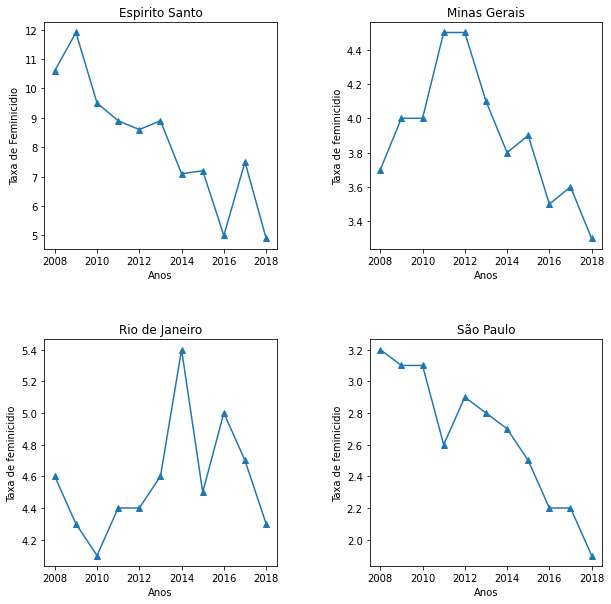

In [30]:
#Quatro valores diferentes para o eixo Y, que correspondem aos dados dos quatro estados da região sudeste.
y1=tx_sudeste.loc['Espirito_Santo','tx_regional_homicidios']
y2=tx_sudeste.loc['Minas_Gerais','tx_regional_homicidios']
y3=tx_sudeste.loc['Rio_de_Janeiro','tx_regional_homicidios']
y4=tx_sudeste.loc['São_Paulo','tx_regional_homicidios']

#definindo a largura e altura de cada gráfico, bem como o espaçamento lateral e horizontal entre cada um deles. 
figura=plt.figure(figsize=(10,10))
figura.subplots_adjust(hspace=0.4,wspace=0.4)

#subplotagem de cada um dos quatro gráficos
figura.add_subplot(2,2,1)
plt.plot(x,y1,marker='^')
plt.title('Espirito Santo')
plt.xlabel('Anos')
plt.ylabel('Taxa de Feminicidio')

figura.add_subplot(2,2,2)
plt.plot(x,y2,marker='^')
plt.title('Minas Gerais')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(2,2,3)
plt.plot(x,y3,marker='^')
plt.title('Rio de Janeiro')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(2,2,4)
plt.plot(x,y4,marker='^')
plt.title('São Paulo')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

plt.show()

**A região sudeste é a única na qual todos os estados apresentaram uma variação negativa da taxa de homicídio na série decenal. No Espirito Santo a taxa é reduzida de aproximadamente 10.5 homicídios de mulheres a cada 1000 mil em 2008 para aproximadamente 5.0 mortes em 2018. A tendência de diminuição dessa taxa é observável logo após o ano de 2009. Em São Paulo essa tendência fora continuamente semelhante. O estado apresenta em 2008 uma taxa de homicídio de 3.2 a cada 100 mil mulheres e, no ano de 2018, essa taxa chega a aproximadamente 1.8 a cada 100 mil mulheres.**

**No Rio de Janeiro, mesmo após simultâneas tendências de diminuição e aumento da taxa de homicídios de mulheres a cada 100 mil, o estado registra em 2018 uma taxa menor que a registrada em 2008; 4.3 homicídios femininos a cada 100 mil mulheres ante 4.6 homicídios no primeiro ano da série. Em minas gerais, a partir do ano de 2012, no qual o estado registrou sua maior taxa ao longo da série – 4.6 homicídios de mulheres a cada 100 mil – a tendência de diminuição é quase totalmente constante e em 2018 a taxa de aproximadamente 3.2 homicídios a cada 100 mil mulheres é a menor da série; em 2008 a taxa fora de aproximadamente 3.7 mortes de mulheres a cada 100 mil.**  


**Sul**

**Gráficos distribuidos em três quadrantes subplotados em uma única linha.**

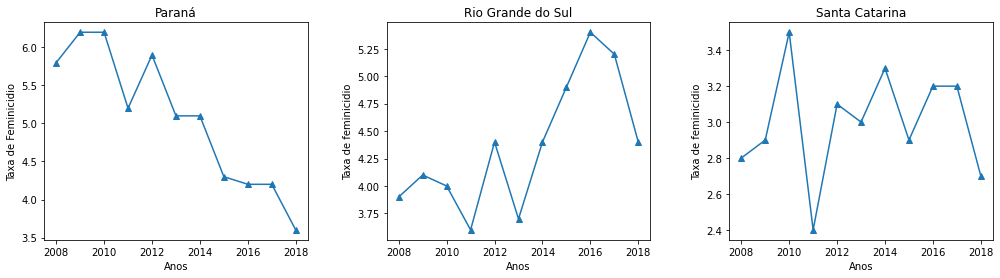

In [31]:
#eixo Y:  três diferentes valores para o eixo que correspondem aos três estados da região Sul
y1=tx_sul.loc['Parana','tx_regional_homicidios']
y2=tx_sul.loc['Rio_Grande_do_Sul','tx_regional_homicidios']
y3=tx_sul.loc['Santa_Catarina','tx_regional_homicidios']

#definindo a largura e altura de cada gráfico, bem como o espaçamento lateral e horizontal entre cada um deles. 
figura=plt.figure(figsize=(17,4))
figura.subplots_adjust(wspace=0.3)

#subplotagem de cada um dos três gráficos
figura.add_subplot(1,3,1)
plt.plot(x,y1,marker='^')
plt.title('Paraná')
plt.xlabel('Anos')
plt.ylabel('Taxa de Feminicidio')

figura.add_subplot(1,3,2)
plt.plot(x,y2,marker='^')
plt.title('Rio Grande do Sul')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(1,3,3)
plt.plot(x,y3,marker='^')
plt.title('Santa Catarina')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

plt.show()

**Na região Sul os estados do Paraná e Santa Catarina apresentaram uma diminuição da taxa de homicídios de mulheres a cada 100 mil mulheres, enquanto que no estado do Rio Grande do Sul houve um aumento em dez anos. No Paraná, apesar de nos primeiros anos da série existir duas tendências de elevação, a partir do ano de 2012 há uma tendência observável de diminuição da taxa nos anos posteriores. O menor registro é justamente no ano de 2018, uma taxa de aproximadamente 3.6 homicídios de mulheres a cada 100 mil mulheres; em 2008 a taxa registrada fora de aproximadamente 5.8 homicídios femininos a cada 100 mil mulheres. Em Santa Catarina, após tendências sincrônicas de elevação e diminuição da taxa de homicídios de mulheres a cada 100 mil mulheres, o registro em 2018 de 2.7 homicídios de mulheres a cada 100 mil mulheres é menor que o registro no ano de 2008 – 2.8 homicídios a cada 100 mil mulheres.**

**No Rio Grande do Sul, apesar de a taxa em 2018 de aproximadamente 4.3 homicídios de mulheres a cada 100 mil mulheres não ser a maior registrada na série, ela é ainda maior que a registrada em 2008 de aproximadamente 3.9 homicídios de mulheres a cada 100 mil mulheres. A maior taxa registrada fora no ano de 2016, de aproximadamente 5.4 homicídios violentos de mulheres a cada 100 mil mulheres.** 


**Centro Oeste**

**Quatro quadrantes separados em duas linhas com duas colunas cada.**

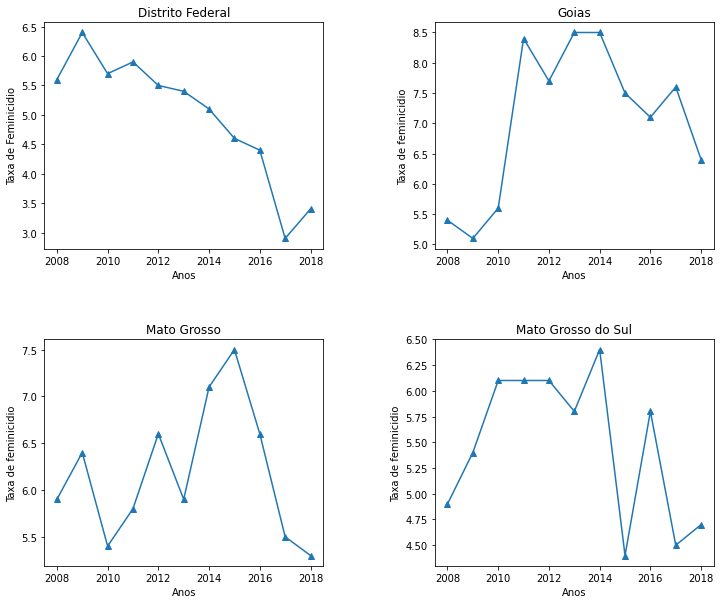

In [32]:
#eixo Y: quatro diferentes valores para o eixo, que correspondem aos quatro estados da região centro-oeste.
y1=tx_centro_oeste.loc['Distrito_Federal','tx_regional_homicidios']
y2=tx_centro_oeste.loc['Goias','tx_regional_homicidios']
y3=tx_centro_oeste.loc['Mato_Grosso','tx_regional_homicidios']
y4=tx_centro_oeste.loc['Mato_Grosso_do_Sul','tx_regional_homicidios']

#definindo a largura, altura de cada gráfico, bem como o espaçamento lateral e horizontal entre cada um deles. 
figura=plt.figure(figsize=(12,10))
figura.subplots_adjust(hspace=0.4,wspace=0.4)

figura.add_subplot(2,2,1)
plt.plot(x,y1,marker='^')
plt.title('Distrito Federal')
plt.xlabel('Anos')
plt.ylabel('Taxa de Feminicidio')


figura.add_subplot(2,2,2)
plt.plot(x,y2,marker='^')
plt.title('Goias')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(2,2,3)
plt.plot(x,y3,marker='^')
plt.title('Mato Grosso')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

figura.add_subplot(2,2,4)
plt.plot(x,y4,marker='^')
plt.title('Mato Grosso do Sul')
plt.xlabel('Anos')
plt.ylabel('Taxa de feminicidio')

plt.show()

**Na região Centro-Oeste, somente o estado de Goiás apresentou uma elevação da taxa de homicídios de mulheres nos dez anos da série, os demais estados, Distrito Federal, Mato Grosso e Mato Grosso do Sul apresentaram uma diminuição de suas taxas de homicídios. No caso de Goiás, a taxa de 2008 fora de aproximadamente 5.4 homicídios de mulheres a cada 100 mil mulheres e em 2018 essa taxa aumentou para 6.5 homicídios do mesmo tipo; o maior valor registrado no estado fora nos anos de 2013 e 2014, aproximadamente 8.4 homicídios violentos de mulheres a cada 100 mil mulheres.**

**No Distrito Federal a tendência de diminuição é expressiva. A taxa em 2008 de 5.5 homicídios de mulheres a cada 100 mil mulheres inicialmente apresenta um aumento no ano de 2009, mas a partir de então há constantes diminuições. A menor taxa é registrada em 2017: aproximadamente 2.9 homicídios de mulheres a cada 100 mil mulheres e em 2018 há um leve aumento para aproximadamente 3.3 homicídios de mulheres a cada 100 mil mulheres No estado do Mato Grosso, há simultâneas tendências de elevação e diminuição da taxa de homicídios de mulheres a cada 100 mil mulheres, mas ainda assim o valor m 2018 é menor que o observado em 2008; foram aproximadamente 5.2 homicídios violentos de mulheres a cada 100 mil mulheres em 2018 ante aproximadamente 5.9 homicídios de mulheres a cada 100 mil mulheres em 2008. Em Mato Grosso do Sul a taxa em 2018 de aproximadamente 4.7 homicídios de mulheres a cada 100 mil mulheres é menor que a taxa de aproximadamente 4.9 homicídios de mulheres a cada 100 mil mulheres, a menor taxa registrada na série analisada fora no ano de 2015, aproximadamente 4.3 homicídios de mulheres a cada 100 mil mulheres.** 


#**Estados com variação positiva e estados com variação negativa das taxas de feminicídio.**

**Levando em consideração a série decenal analisada, temos então dois grupos: os estados que apresentaram uma diminuição da taxa de feminicidio ao longo da série e os estados que apresentaram uma elevação dessa mesma taxa.** 

**Vamos então separa-los em dois datasets:**

- Para os que tiveram uma variação positiva da taxa, encontraremos os três estados com as maiores taxas de feminicidio no ano de 2018 e visualizar suas trajetórias graficamente. 

- Para aqueles que apresentaram uma queda da taxa, encontraremos os três estados com as menores taxas também em 2018 para desse modo fazermos graficamente a mesma visualização.


- Doze estados apresentaram um crescimento da taxa nesses 10 anos. Lançando mão novamente do conceito de tabela da verdade, agruparemos estes estados no dataset 'ufs_variação_positiva'. 

- Quinze estados apresentaram uma diminuição da taxa, e da mesma forma, agruparemos tais estados em uma variável, denominada de 'ufs_variação_negativa; segue o código.

In [33]:
ufs_variacao_positiva=dados_ufs[(dados_ufs.ufs=='Acre')|(dados_ufs.ufs=='Amazonas')|(dados_ufs.ufs=='Para')|
                            (dados_ufs.ufs=='Roraima')|(dados_ufs.ufs=='Tocantins')|(dados_ufs.ufs=='Bahia')|
                            (dados_ufs.ufs=='Ceara')|(dados_ufs.ufs=='Maranhão')|(dados_ufs.ufs=='Piaui')|
                            (dados_ufs.ufs=='Rio_Grande_do_Norte')|(dados_ufs.ufs=='Rio_Grande_do_Sul')|
                            (dados_ufs.ufs=='Goias')]
ufs_variação_negativa=dados_ufs[(dados_ufs.ufs=='Rondonia')|(dados_ufs.ufs=='Amapa')|(dados_ufs.ufs=='Pernambuco')|
                            (dados_ufs.ufs=='Sergipe')|(dados_ufs.ufs=='Paraiba')|(dados_ufs.ufs=='Alagoas')|
                            (dados_ufs.ufs=='São_Paulo')|(dados_ufs.ufs=='Rio_de_Janeiro')|
                            (dados_ufs.ufs=='Minas_Gerais')|(dados_ufs.ufs=='Espirito_Santo')|
                            (dados_ufs.ufs=='Distrito_Federal')|(dados_ufs.ufs=='Mato_Grosso')|
                            (dados_ufs.ufs=='Mato_Grosso_do_Sul')|(dados_ufs.ufs=='Parana')|
                            (dados_ufs.ufs=='Santa_Catarina')]

**- Com os dois grupos separados, vamos então compilar somente os dados de 2018 de cada um dos grupos.**

**- Então vamos ordenar essas taxas em forma descendente para os estados com variação positiva e de forma ascendente para os estados com variação negativa.**

**- Dessa forma é possível identificar os três estados mais violentos em 2018 dentre os que tiveram um aumento das taxas de feminicídios e os três estados menos violentos em 2018 dentre aqueles que tiveram uma variação negativa dessa mesma taxa.**

In [34]:
#UF'S com variação positiva

#filtrando somente os dados de 2018.
maior_taxa=ufs_variacao_positiva[(ufs_variacao_positiva.ano==2018)]

#indexando-os pelos nomes das uf's.
maior_taxa=maior_taxa.set_index('ufs')

#ordenando esses dados de forma descendente.
maior_taxa.tx_regional_homicidios.sort_values(ascending=False)

ufs
Roraima                20.5
Ceara                  10.3
Acre                    8.4
Para                    7.7
Goias                   6.4
Amazonas                6.2
Tocantins               5.9
Rio_Grande_do_Norte     5.7
Bahia                   5.4
Rio_Grande_do_Sul       4.4
Maranhão                3.4
Piaui                   3.2
Name: tx_regional_homicidios, dtype: float64

In [35]:
#UFS com variação negativa

#filtrando somente os dados de 2018.
menor_taxa=ufs_variação_negativa[(ufs_variação_negativa.ano==2018)]

##indexando-os pelos nomes das uf's.
menor_taxa=menor_taxa.set_index('ufs')

#ordenando esses dados de forma ascendente
menor_taxa.tx_regional_homicidios.sort_values()

ufs
São_Paulo             1.9
Santa_Catarina        2.7
Sergipe               3.3
Minas_Gerais          3.3
Distrito_Federal      3.4
Parana                3.6
Amapa                 3.7
Alagoas               3.9
Paraiba               4.0
Rio_de_Janeiro        4.3
Rondonia              4.7
Mato_Grosso_do_Sul    4.7
Espirito_Santo        4.9
Pernambuco            5.0
Mato_Grosso           5.3
Name: tx_regional_homicidios, dtype: float64

**- Do grupo de estados que apresentaram elevação das taxas de feminicídio, temos que em 2018, as três ufs mais violentas para as mulheres foram, de forma decrescente: Roraima, Ceará e o Acre. Como visto, a taxa em Roraima alcançou 20 homicídios violentos de mulheres a cada 100 mil; no estado do Ceará essa taxa chegou a 10 mortes; e em Acre aproximadamente 8.0 mulheres a cada 100 mil morreram de forma violenta.** 

**- No grupo de estados com diminuições dessas taxas ao longo da série, as três menores taxas em 2018 pertenceram, de forma ascendente, aos estados de São Paulo - 1.9 homicídio violento feminino a cada 100 mil mulheres, Santa Catarina - 2.7 mortes do mesmo tipo - e Sergipe - 3.3 homicídios violentos a cada 100 mil mulheres.**

**- Vamos então a plotagem dos gráficos. Primeiro a visualização das trajetórias das taxas de homicídios dos três estados mais violentos em 2018, em seguida a visualização das trajetórias das mesmas taxas dos estados menos violentos.**

**Avaliando a trajetória das taxas de feminicídios destes estados em gráficos múltiplos.**

**Estados que apresentaram variação positiva.**

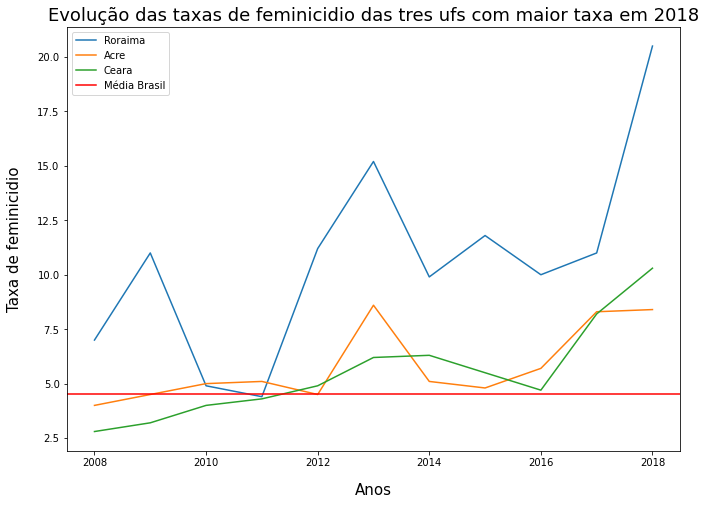

In [39]:
#definindo os valores dos eixo X e Y.
x=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
y1=tx_norte.loc['Roraima','tx_regional_homicidios']
y2=tx_norte.loc['Acre','tx_regional_homicidios']
y3=tx_nordeste.loc['Ceara','tx_regional_homicidios']

#plotando o gráfico de multilinhas - x são os anos de estudo dos dados; 
#para cada um deles teremos tres valores correspondentes no eixo y, que se referem cada linha a um estado.
figura= plt.figure(figsize= (11,7.8))
figura= plt.plot(x,y1,ls='-',label='Roraima')
figura= plt.plot(x,y2,ls='-',label='Acre')
figura= plt.plot(x,y3,ls='-',label='Ceara')

#plotando uma linha horizontal com a média naciopnal dos homicidios de mulheres a cada 100 mil na série analisada, visando efeitos de comparação.
plt.axhline(y=dados_brasil.tx_nacional_homicidios.mean(), color='r', linestyle='-',label='Média Brasil')

#Definindo os titulos do gráfico, eixo X e eixo Y.
plt.title('Evolução das taxas de feminicidio das tres ufs com maior taxa em 2018',fontsize=18)
plt.xlabel('Anos',fontsize=15, labelpad= 15)
plt.ylabel('Taxa de feminicidio',fontsize=15, labelpad= 15)
plt.legend(loc=0)

plt.show()


**Estados que apresentaram variação negativa.**

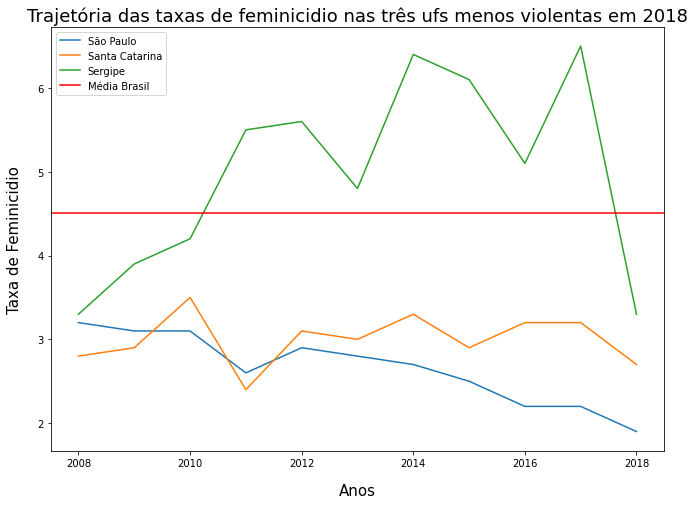

In [41]:
#definindo os valores do eixo y 
y1=tx_sudeste.loc['São_Paulo','tx_regional_homicidios']
y2=tx_sul.loc['Santa_Catarina','tx_regional_homicidios']
y3=tx_nordeste.loc['Sergipe','tx_regional_homicidios']

#plotando o gráfico de multilinhas - x são os anos de estudo dos dados; 
#para cada um deles teremos tres valores correspondentes no eixo y, que se referem cada linha a um estado.
figura= plt.figure(figsize= (11, 7.8))
figura= plt.plot(x,y1,ls='-',label='São Paulo')
figura= plt.plot(x,y2,ls='-',label='Santa Catarina')
figura= plt.plot(x,y3,ls='-',label='Sergipe')
#plotando uma linha horizontal com a média naciopnal dos homicidios de mulheres a cada 100 mil na série analisada, visando efeitos de comparação.
plt.axhline(y=dados_brasil.tx_nacional_homicidios.mean(), color='r', linestyle='-',label='Média Brasil')
#Definindo os titulos do gráfico, eixo X e eixo Y.
plt.xlabel('Anos', fontsize= 15, labelpad= 15)
plt.ylabel('Taxa de Feminicidio', fontsize= 15, labelpad= 15)
plt.title('Trajetória das taxas de feminicidio nas três ufs menos violentas em 2018', fontsize= 18)
plt.legend(loc=0)

plt.show()

#**Homicídios de mulheres por raça**

 **Sabemos que no Brasil há uma desigualdade racial em diversos setores, pois as denúncias e os casos públicos de racismo, as diferenças entre raças em ocupações de cargos importantes, entre outros aspectos, infelizmente são comuns em nosso dia a dia, e com os casos de feminicídio não é diferente. Na próxima sessão iremos visualizar a trajetória dos dados sobre homicídios de mulheres nos ultimos dez anos em relação a raça das vítimas e dessa forma veremos que esse tipo de violência é muito mais comum entre mulheres negras.**

In [42]:
#fazendo a leitura do aquivo csv, definindo o formato, o separador e o cabeçalho vazio.
fem_por_raca=pd.read_csv('/content/feminicidios_raca.csv',encoding='latin-1',sep='/t',header=None)
fem_por_raca.head(25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0
0,Óbitos por Causas Externas - Brasil
1,Óbitos p/Ocorrênc por Ano do Óbito e Cor/raça
2,Grande Grupo CID10: X85-Y09 Agressões
3,Sexo: Fem
4,Período:2008-2018
5,"""Ano do Óbito"";""Branca"";""Preta"";""Amarela"";""Par..."
6,"""2008"";1544;279;13;1974;21;192;4023"
7,"""2009"";1591;273;15;2143;28;210;4260"
8,"""2010"";1590;284;12;2319;22;238;4465"
9,"""2011"";1522;314;8;2397;23;248;4512"


**- O arquivo traz os homicidios de mulheres por agressão levando em consideração a raça das vitimas no momento em que a morte fora registrada.**

**- Então temos o múmero total de mulheres pardas, pretas, brancas, indigenas e amarelas que tiveram seus obitos decretados por razão de agressão em cada ano da série.**

**- Entretanto vemos que é necessário fazer alguns tratamentos na leitura do DATASET; vamos então definir no código abaixo os cabeçalhos do DATASET no momento da leitura do arquivo, escolher o separador dos dados e excluir as linhas indesejadas.**

In [43]:
#fazendo a leitura do aquivo csv, definindo o formato, separador e as colunas do DATASET
fem_por_raca=pd.read_csv('/content/feminicidios_raca.csv',encoding='latin-1',sep=';',header=None,
                         names=['Ano','Branca','Preta','Amarela','Parda','Indigena','Ignorado','Total'])
fem_por_raca.head(15)

,Ano,Branca,Preta,Amarela,Parda,Indigena,Ignorado,Total
0,Óbitos por Causas Externas - Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Óbitos p/Ocorrênc por Ano do Óbito e Cor/raça,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grande Grupo CID10: X85-Y09 Agressões,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sexo: Fem,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Período:2008-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ano do Óbito,Branca,Preta,Amarela,Parda,Indígena,Ignorado,Total
6,2008,1544,279,13,1974,21,192,4023
7,2009,1591,273,15,2143,28,210,4260
8,2010,1590,284,12,2319,22,238,4465
9,2011,1522,314,8,2397,23,248,4512


In [44]:
#dropando as linhas indesejadas
fem_por_raca=fem_por_raca.drop([0,1,2,3,4,5,17,18,19,20,21,22,23],axis=0)
fem_por_raca.head(15)

,Ano,Branca,Preta,Amarela,Parda,Indigena,Ignorado,Total
6,2008,1544,279,13,1974,21,192,4023
7,2009,1591,273,15,2143,28,210,4260
8,2010,1590,284,12,2319,22,238,4465
9,2011,1522,314,8,2397,23,248,4512
10,2012,1535,369,5,2545,40,225,4719
11,2013,1576,337,14,2538,51,246,4762
12,2014,1569,320,7,2670,42,224,4832
13,2015,1492,325,13,2572,34,180,4616
14,2016,1432,329,6,2670,46,152,4635
15,2017,1490,319,13,2963,39,104,4928


**O DataSet traz em sua ultima coluna anualmente os dados totais de homicidios de mulheres por qualquer tipo de agressão ocorridos no Brasil durante os anos de 2008 a 2018, registrando nas colunas anteriores os totais de casos em que as vitimas eram autodeclaradas como brancas, pretas, amarelas, pardas, indígenas ou os casos em que a raça das vítimas foram ignoradas nos registros.**


**Observamos, em um pirmeiro momento, que as três raças com mais registros dessas mortes em todos os anos foram a das mulheres autodeclaradas como Pardas, Brancas e pretas, nesta ordem decrescente.**

In [45]:
#conhecendo o formato com que os dados foram tratados
fem_por_raca.dtypes

Ano         object
Branca      object
Preta       object
Amarela     object
Parda       object
Indigena    object
Ignorado    object
Total       object
dtype: object

In [46]:
#verifca-se que as colunas trazem conjuntos de strings, mesmo com os dados escritos em formato numérico.
#transformando todo o  DataSet em séries de numeros inteiros.
fem_por_raca=fem_por_raca.astype(int)
#visualizando a alteração
fem_por_raca.dtypes

Ano         int64
Branca      int64
Preta       int64
Amarela     int64
Parda       int64
Indigena    int64
Ignorado    int64
Total       int64
dtype: object

**Para melhor visualização e compreensão dos dados, iremos separar todo o Dataset em dois grupos: as mulheres vítimas de raça negra, que será a soma das mulheres autodeclaradas como pardas e pretas, e as mulheres vitimas de raça branca ou outra raça, que somarão o grupo das vitimas autodeclaradas como brancas, indígenas e amarelas.**

In [47]:
#somando as raças para criarmos duas colunas com novas listas: 'vitimas_negras' e 'vitimas_outras_raças'
fem_por_raca['vitimas_outras_racas']=fem_por_raca['Branca']+fem_por_raca['Amarela']+fem_por_raca['Indigena']
fem_por_raca['vitimas_raca_negra']=fem_por_raca['Parda']+fem_por_raca['Preta']

#excluindo as antigas colunas não mais necessárias para a análise
fem_por_raca=fem_por_raca.drop(columns=['Branca','Parda','Preta','Amarela','Indigena','Ignorado','Total'])
fem_por_raca.head()

,Ano,vitimas_outras_racas,vitimas_raca_negra
6,2008,1578,2253
7,2009,1634,2416
8,2010,1624,2603
9,2011,1553,2711
10,2012,1580,2914


**No próximo passo criarei no DATASET uma coluna com o total de mortes em cada ano, ou seja, a soma dos homicidios por agressão de mulheres negras e outras raças, pois a última coluna com esse dado levava em conta os casos ignorados.**

In [48]:
#criando uma lista que recebera todas series de 'fem_por_raca' e logo depois removendo a coluna 'ano', que não iremos usar.
lista_colunas=list(fem_por_raca)
lista_colunas.remove('Ano')
#adicionando essa lista ao DataSet na variável 'Total', que por sua vez, leva a soma de cada linha das vítimas negras e de outras raças. 
fem_por_raca['Total']=fem_por_raca[lista_colunas].sum(axis=1)
fem_por_raca.head()

,Ano,vitimas_outras_racas,vitimas_raca_negra,Total
6,2008,1578,2253,3831
7,2009,1634,2416,4050
8,2010,1624,2603,4227
9,2011,1553,2711,4264
10,2012,1580,2914,4494



**Vamos então visualizar as trajetorias das mortes desses dois grupos de mulheres.**

**Primeiramente vamos ver quantas mortes por grupo racial foram registradas nessa série decenal em sua totalidade.**

In [49]:
print('Nos dez anos de observação desses dados foram registrados',(fem_por_raca.vitimas_raca_negra.sum()),'homicidios por agressão de mulheres negras.')
print('Para o grupo de mulheres brancas/indigenas/amarelas foram registrados',(fem_por_raca.vitimas_outras_racas.sum()), 'homicidios por agressão.')

Nos dez anos de observação desses dados foram registrados 31004 homicidios por agressão de mulheres negras.
Para o grupo de mulheres brancas/indigenas/amarelas foram registrados 17150 homicidios por agressão.


#**As mulheres negras morrem mais, compõem 64% do total de homicídios por agressão registrados em nosso sistema durante a série decenal.**

**Abaixo conseguimos visualizar graficamente essa disparidade.**

**Observamos uma forte tendência de aumento dos homicídios de mulheres negras ao longo dos anos, enquanto que para o grupo de mulheres de outras raças, observa-se uma leve tendência de queda.**

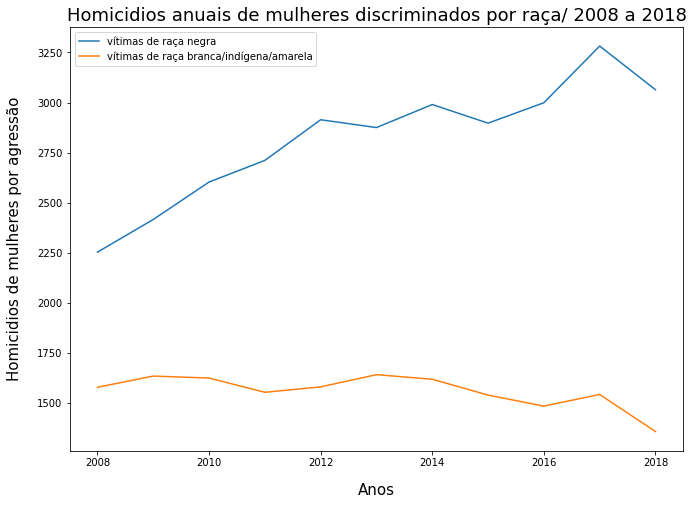

In [52]:
#definindo o eixo X - os anos de observação
x=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

#definindo as variaveis do eixo Y: os homicídios por agressão de mulheres negras e os homicídios por agressão de mulheres de outras raças.
y1=fem_por_raca.vitimas_raca_negra
y2=fem_por_raca.vitimas_outras_racas

#plotando as duas trajetórias

figura= plt.figure(figsize=(11,7.8))
figura= plt.plot(x,y1,ls='-',label='vítimas de raça negra')
figura= plt.plot(x,y2,ls='-',label='vítimas de raça branca/indígena/amarela')
plt.title('Homicidios anuais de mulheres discriminados por raça/ 2008 a 2018', fontsize= 18)
plt.xlabel('Anos', fontsize= 15, labelpad= 15)
plt.ylabel('Homicidios de mulheres por agressão', fontsize= 15, labelpad= 15)

plt.legend()
plt.show()


**Importante ressaltar que observar os dados com tais discriminações tem um único objetivo: nos questionarmos! O fato é que ao longo dos anos as autoridades brasileiras vem implementando diversas medidas para diminuir suas taxas de feminicídio, o que é importante, mas observar tais dados nos incita a questionar se essas tomadas de decisão estão sendo universalizadas para todos os grupos de mulheres.**
 
**E observar os dados é um ótimo primeiro passo para que a sociedade possa cobrar mudanças ou melhorias de políticas, programas e leis públicas que lidam com o tema.**



**Outras considerações**

**Não se sabe se essas trajetórias de crescimento das taxas de homicídio por agressão refletem um real aumento das taxas de feminicídio, uma vez que a classificação internacional de doenças (CID), utilizada pelo Ministério da Saúde para gerar os dados, não lida com questões de tipificação legal dos crimes e muito menos com a motivação que gerou a agressão ocorrida de morte. Além disso, o aumento dos registros pode refletir efetivamente um aumento do número de casos ou uma diminuição das subnotificações por parte das polícias, que são os responsáveis por gerarem os dados locais.**

**Entretanto, microdados da saúde disponíveis a sociedade que indicam o número de mortes violentas intencionais dentro das residências das próprias vítimas é uma boa proxy para medir o feminicídio, uma vez que a literatura internacional reconhece que a maioria dessas mortes violentas dentro das residências são perpetradas por conhecidos ou íntimos das vítimas. E mesmo que o número real de feminicídios não seja igual ao número de mulheres mortas dentro das residências, uma vez que muitas das ocorrências ocorrem fora das residências, tal proxy pode servir como base para a evolução das taxas de feminicídio no país.**

**Vamos então analisar esses dados.**

In [ ]:
#lendo o banco de dados, definindo a leitura do dataset em forma de dados tabulares, versão latino americana e sem um cabeçalho
fem_por_local=pd.read_csv('/content/fem_por_local.csv',encoding='latin-1',sep='\t',header=None)
fem_por_local.head(20)

,0
0,Óbitos por Causas Externas - Brasil
1,Óbitos p/Residênc por Local ocorrência e Ano d...
2,Grande Grupo CID10: X85-Y09 Agressões
3,Sexo: Fem
4,Período:2008-2018
5,"Local ocorrência;""2008"";""2009"";""2010"";""2011"";""..."
6,Hospital;1002;1031;1071;1028;1139;1123;1121;10...
7,Outro estabelecimento de saúde;58;74;61;68;87;...
8,Domicílio;1164;1199;1293;1295;1311;1290;1319;1...
9,Via pública;1179;1310;1339;1430;1405;1488;1462...


**- Antes de tratar os dados corretamente, verifica-se que cada coluna se refere a um ano de observação dos dados.**

**- Já nas linhas temos o local de registro dos homicídios.**

**- Logo vamos ler o arquivo de forma a definir o cabeçalho como o local das mortes e os anos de observação, definir o separador dos dados e a versão de leitura latino-americana.**

In [ ]:
#definindo na leitura dos dados um cabeçalho, que serão os anos de registro dessas mortes por local de ocorrência, o separador e a versão de leitura.
fem_por_local=pd.read_csv('/content/fem_por_local.csv',encoding='latin-1',sep=';',
                          header=None,names=['Local_morte','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])
fem_por_local.head(20)

,Local_morte,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Óbitos por Causas Externas - Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Óbitos p/Residênc por Local ocorrência e Ano d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grande Grupo CID10: X85-Y09 Agressões,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sexo: Fem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Período:2008-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Local ocorrência,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
6,Hospital,1002.0,1031.0,1071.0,1028.0,1139.0,1123.0,1121.0,1041.0,1044.0,1022.0,905.0
7,Outro estabelecimento de saúde,58.0,74.0,61.0,68.0,87.0,77.0,97.0,83.0,93.0,95.0,102.0
8,Domicílio,1164.0,1199.0,1293.0,1295.0,1311.0,1290.0,1319.0,1307.0,1393.0,1383.0,1322.0
9,Via pública,1179.0,1310.0,1339.0,1430.0,1405.0,1488.0,1462.0,1395.0,1317.0,1437.0,1384.0


In [ ]:
#excluindo as linhas desnecessárias a análise
fem_por_local=fem_por_local.drop([0,1,2,3,4,5,13,14,15,16,17,18],axis=0)
fem_por_local.head(15)

,Local_morte,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,Hospital,1002.0,1031.0,1071.0,1028.0,1139.0,1123.0,1121.0,1041.0,1044.0,1022.0,905.0
7,Outro estabelecimento de saúde,58.0,74.0,61.0,68.0,87.0,77.0,97.0,83.0,93.0,95.0,102.0
8,Domicílio,1164.0,1199.0,1293.0,1295.0,1311.0,1290.0,1319.0,1307.0,1393.0,1383.0,1322.0
9,Via pública,1179.0,1310.0,1339.0,1430.0,1405.0,1488.0,1462.0,1395.0,1317.0,1437.0,1384.0
10,Outros,568.0,599.0,657.0,656.0,753.0,748.0,792.0,759.0,751.0,960.0,784.0
11,Ignorado,52.0,47.0,44.0,35.0,24.0,36.0,41.0,31.0,37.0,31.0,15.0
12,Total,4023.0,4260.0,4465.0,4512.0,4719.0,4762.0,4832.0,4616.0,4635.0,4928.0,4512.0


**Reparemos um erro: os dados foram extraídos como se fossem números flutuantes. Para corrigir tal problema foi conveniente usar a função round para arredondar esses dados, o que significa cortar a casa decimal depois do ponto, e então trasnformar o formato desses dados para séries de inteiros.**

In [ ]:
#visualizando o formato dos dados de cada coluna
fem_por_local.dtypes

Local_morte     object
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
dtype: object

In [ ]:
#utilizando a biblioteca numpy, arredondamos os dados e logo após os transformamos em séries de inteiros. Coluna por coluna. 
fem_por_local['2008']=(round(fem_por_local['2008'])).values.astype(np.int64)
fem_por_local['2009']=(round(fem_por_local['2009'])).values.astype(np.int64)
fem_por_local['2010']=(round(fem_por_local['2010'])).values.astype(np.int64)
fem_por_local['2011']=(round(fem_por_local['2011'])).values.astype(np.int64)
fem_por_local['2012']=(round(fem_por_local['2012'])).values.astype(np.int64)
fem_por_local['2013']=(round(fem_por_local['2013'])).values.astype(np.int64)
fem_por_local['2014']=(round(fem_por_local['2014'])).values.astype(np.int64)
fem_por_local['2015']=(round(fem_por_local['2015'])).values.astype(np.int64)
fem_por_local['2016']=(round(fem_por_local['2016'])).values.astype(np.int64)
fem_por_local['2017']=(round(fem_por_local['2017'])).values.astype(np.int64)
fem_por_local['2018']=(round(fem_por_local['2018'])).values.astype(np.int64)

#visualizando o novo DataSet
fem_por_local.head(10)

,Local_morte,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,Hospital,1002,1031,1071,1028,1139,1123,1121,1041,1044,1022,905
7,Outro estabelecimento de saúde,58,74,61,68,87,77,97,83,93,95,102
8,Domicílio,1164,1199,1293,1295,1311,1290,1319,1307,1393,1383,1322
9,Via pública,1179,1310,1339,1430,1405,1488,1462,1395,1317,1437,1384
10,Outros,568,599,657,656,753,748,792,759,751,960,784
11,Ignorado,52,47,44,35,24,36,41,31,37,31,15
12,Total,4023,4260,4465,4512,4719,4762,4832,4616,4635,4928,4512


**Em um primeiro momento conseguimos observar e concluir que a maioria dos crimes ocorreram em vias públicas, seguidos exatamente dos crimes que ocorreram nas próprias residências das vítimas com diferenças não muito significativas; eis a nossa proxy.**

**E para que possamos visualizar melhor essa comparação, Vamos criar uma coluna que irá conter o total de mortes na série decenal por cada local de ocorrência.** 

In [ ]:
#criando uma lista que recebera todo o DATASET
lista_colunas=list(fem_por_local)
#criando uma coluna 'Total' no DATASET, que receberá os dados da lista criada e somados linha por linha. 
fem_por_local['Total']=fem_por_local[lista_colunas].sum(axis=1)
fem_por_local.head(10)


,Local_morte,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
6,Hospital,1002,1031,1071,1028,1139,1123,1121,1041,1044,1022,905,11527
7,Outro estabelecimento de saúde,58,74,61,68,87,77,97,83,93,95,102,895
8,Domicílio,1164,1199,1293,1295,1311,1290,1319,1307,1393,1383,1322,14276
9,Via pública,1179,1310,1339,1430,1405,1488,1462,1395,1317,1437,1384,15146
10,Outros,568,599,657,656,753,748,792,759,751,960,784,8027
11,Ignorado,52,47,44,35,24,36,41,31,37,31,15,393
12,Total,4023,4260,4465,4512,4719,4762,4832,4616,4635,4928,4512,50264


In [ ]:
#verificando as ordens descendentes de tais dados

#definindo os locais das mortes como indexador para melhor visualização
fem_por_local=fem_por_local.set_index('Local_morte')

#visualizando os dados de forma descendente
fem_por_local.Total.sort_values(ascending=False)


Local_morte
Total                             50264
Via pública                       15146
Domicílio                         14276
Hospital                          11527
Outros                             8027
Outro estabelecimento de saúde      895
Ignorado                            393
Name: Total, dtype: int64

In [ ]:
print('De um total de 50.264 mortes de mulheres por motivos de agressão,',("{:.2f}".format((14276/50264)*100)),
      '% ocorreram dentro dos proprios domicilios dessas mulheres, o que somam 14.276 mortes desse tipo.')

De um total de 50.264 mortes de mulheres por motivos de agressão, 28.40 % ocorreram dentro dos proprios domicilios dessas mulheres, o que somam 14.276 mortes desse tipo.


**Considerações finais.**

**O feminicidio é um problema socioeconômico que recebe cada vez mais apelo por mudanças no cenário brasileiro, um dos países mais violentos para uma mulher viver, e trabalhos analíticos desse tipo podem orientar tomadas de decisão que visam combater o fenômeno em nossa sociedade, bem como colaborar com estudos sociais aplicados que tentam identificar a efetividade dos diferentes programas e leis voltadas ao combate do feminicídio.**